In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_breast_cancer()

X_train_full, X_test, y_train_full, y_test = train_test_split(data.data, data.target, random_state=99) 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=99)

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)


np.random.seed(99)
tf.random.set_seed(99)

In [3]:
X_train.shape

(319, 30)

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100,activation='relu',input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(50,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy", 
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=['binary_accuracy'])
fit = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
evaluation = model.evaluate(X_test, y_test)

Epoch 1/20
10/10 [==============================] - 0s 11ms/step - loss: 0.4908 - binary_accuracy: 0.8213 - val_loss: 0.2945 - val_binary_accuracy: 0.9533
Epoch 2/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2362 - binary_accuracy: 0.9310 - val_loss: 0.1821 - val_binary_accuracy: 0.9626
Epoch 3/20
10/10 [==============================] - 0s 2ms/step - loss: 0.1460 - binary_accuracy: 0.9436 - val_loss: 0.1517 - val_binary_accuracy: 0.9626
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 0.1039 - binary_accuracy: 0.9592 - val_loss: 0.1452 - val_binary_accuracy: 0.9626
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 0.0809 - binary_accuracy: 0.9687 - val_loss: 0.1417 - val_binary_accuracy: 0.9626
Epoch 6/20
10/10 [==============================] - 0s 2ms/step - loss: 0.0653 - binary_accuracy: 0.9875 - val_loss: 0.1409 - val_binary_accuracy: 0.9626
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 0.0

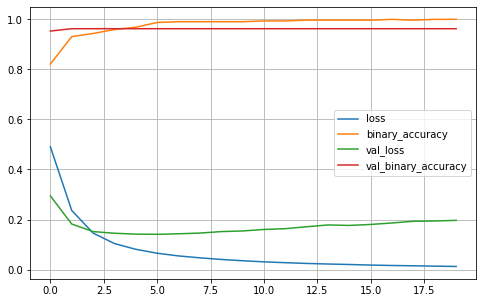

In [5]:
history = pd.DataFrame(fit.history)
history.plot(figsize=(8, 5))
plt.grid(True)

In [6]:
min(history['val_loss'])

0.1408850997686386

In [7]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(100,activation='relu',input_shape = X_train.shape[1:]))
model2.add(keras.layers.Dense(50,activation='relu'))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.compile(loss="binary_crossentropy", 
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=['binary_accuracy'])
fit2 = model2.fit(X_train, y_train, epochs=6, validation_data=(X_valid, y_valid))
evaluation2 = model2.evaluate(X_test, y_test)

Epoch 1/6
10/10 [==============================] - 0s 9ms/step - loss: 0.6254 - binary_accuracy: 0.6552 - val_loss: 0.4094 - val_binary_accuracy: 0.9626
Epoch 2/6
10/10 [==============================] - 0s 2ms/step - loss: 0.3348 - binary_accuracy: 0.9404 - val_loss: 0.2427 - val_binary_accuracy: 0.9533
Epoch 3/6
10/10 [==============================] - 0s 2ms/step - loss: 0.1987 - binary_accuracy: 0.9404 - val_loss: 0.1781 - val_binary_accuracy: 0.9626
Epoch 4/6
10/10 [==============================] - 0s 2ms/step - loss: 0.1359 - binary_accuracy: 0.9592 - val_loss: 0.1560 - val_binary_accuracy: 0.9626
Epoch 5/6
10/10 [==============================] - 0s 2ms/step - loss: 0.1015 - binary_accuracy: 0.9655 - val_loss: 0.1459 - val_binary_accuracy: 0.9626
Epoch 6/6
5/5 [==============================] - 0s 598us/step - loss: 0.0981 - binary_accuracy: 0.9790


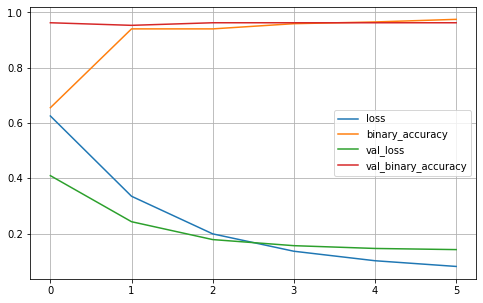

In [8]:
history2 = pd.DataFrame(fit2.history)
history2.plot(figsize=(8, 5))
plt.grid(True)

In [9]:
X_new = X_test[:10]
y_pred = model.predict(X_new)
y_pred 

array([[9.9937916e-01],
       [9.9999976e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9971539e-01],
       [7.5432658e-04],
       [6.0739368e-02],
       [1.5548383e-12],
       [9.9948174e-01],
       [1.0000000e+00]], dtype=float32)